In [71]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

<br></br>
<br></br>
<h1><center><font size="6">Locating underwater pingers with an AUV</font></center></h1>

<br></br>
<font size="5">
    <p1><center>AUV stands for <b>autonomous underwater vehicle</b>.</center></p1> 
</font>

<center>
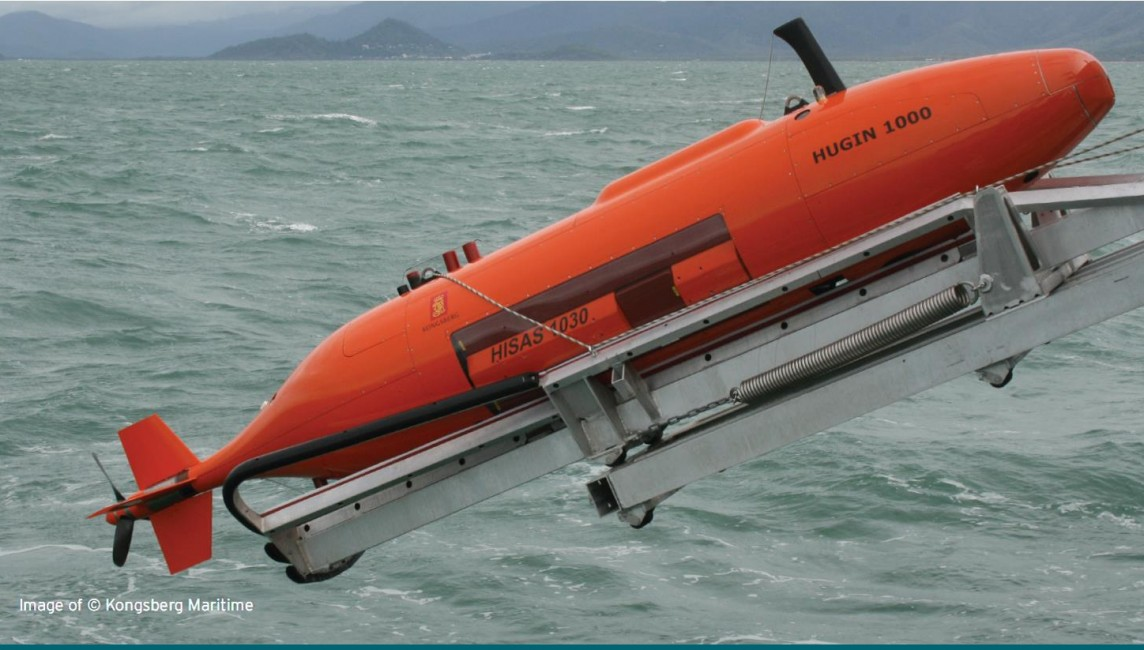
</center>


<center>
    
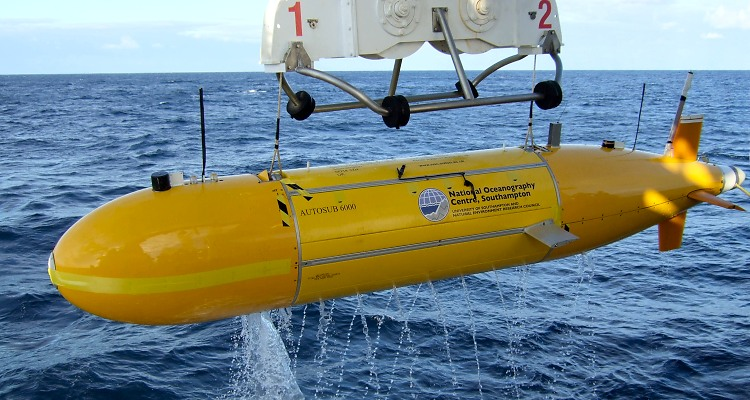
</center>

<center>
    
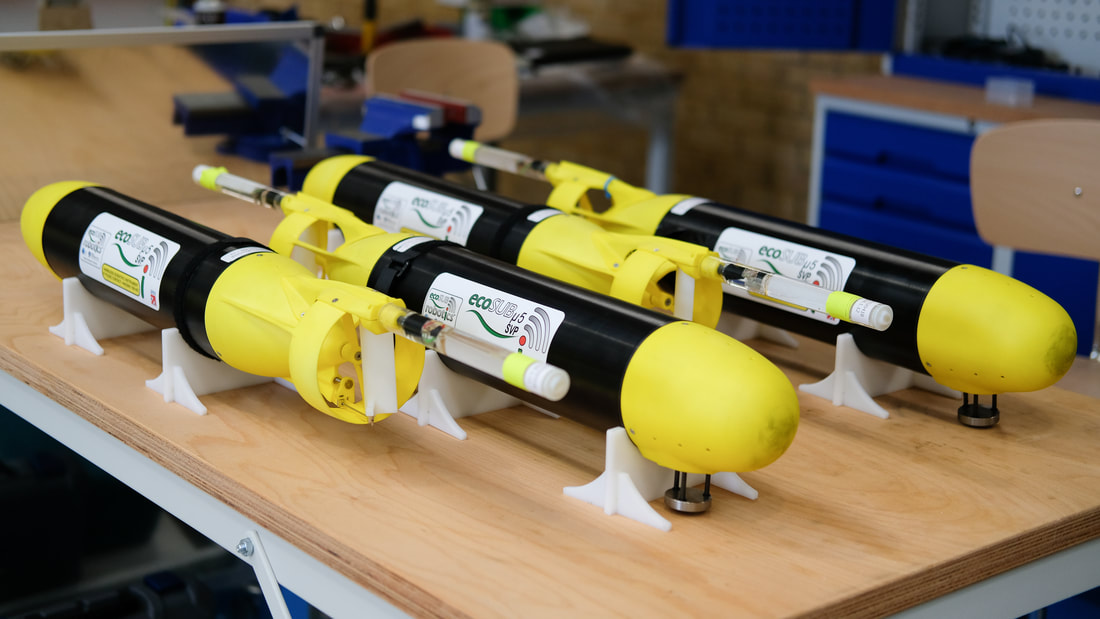
</center>
    

<br></br>
<font size="4">
    <center>
        <p1>We would like to locate an underwater pinger: an acoustic beacon that emits a pulse of a fixed frequency at regular intervals.</p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
        <p1>An important example is the locator beacon attached to the black box of an airplane.</p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
        <p1>The low frequency locator beacon sounds like this (a 8.8 kHz pulse):</p1>
    </center>
</font>

In [72]:
import IPython
from IPython.core.display import HTML
IPython.display.Audio("C:/Users/emushka/Desktop/LF_ulb.wav")

<br></br>
<font size="4">
    <center>
        <p1>Traditionally, to locate a pinger, a towfish holding one hydrophone is towed in a grid pattern over a large area.</p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
        <p1>The position of the towfish and the loudness of the ping is recorded whenever a ping is detected.</p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
        <p1>The location of the pinger is estimated as the position where the loudest ping was heard.</p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
        <p1>Below is a description of the pinger locator used to search for the black box of Malaysia Airlines flight 370.</p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
        <p1>To this date the black box has not been found.</p1>
    </center>
</font>

<center>
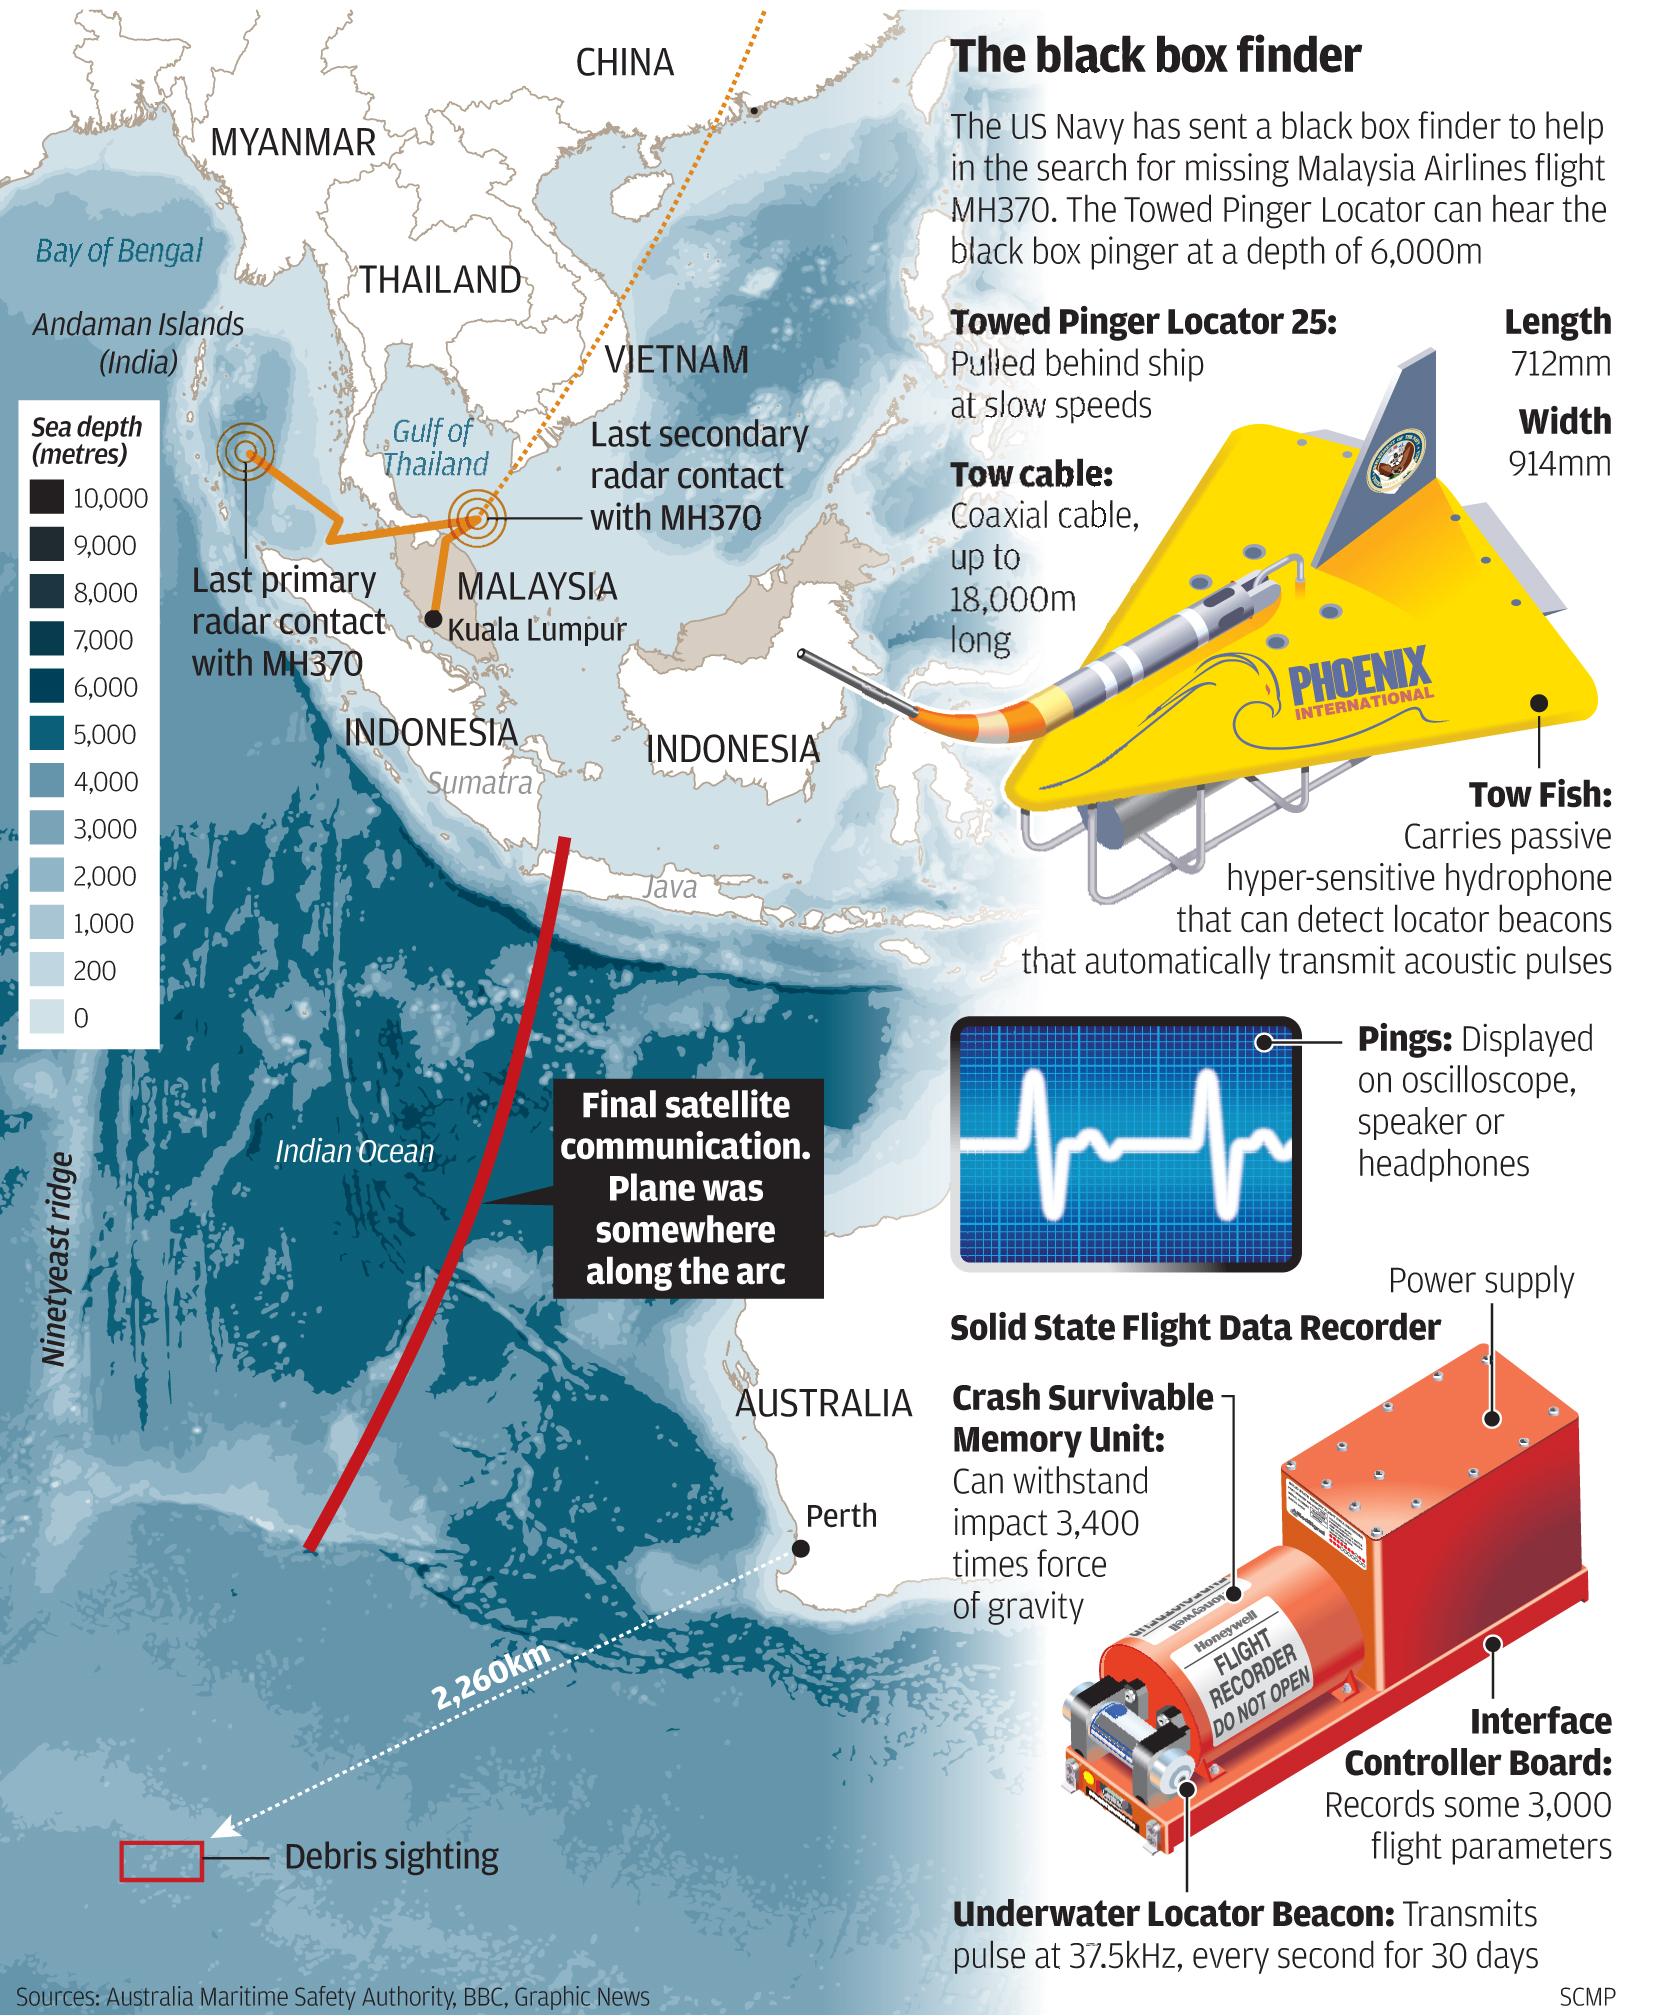
</center>

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import mpld3
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.path as mpath

plt.style.use('dark_background')

numrows = 15
horpts = 50
circpts = 20
rad = 2;
leng = 160;

cLx = rad*np.cos(np.linspace(3/2*np.pi,np.pi/2,circpts))
cLy = rad*np.sin(np.linspace(3/2*np.pi,np.pi/2,circpts))
cRx = rad*np.cos(np.linspace(-np.pi/2,np.pi/2,circpts))
cRy = rad*np.sin(np.linspace(-np.pi/2,np.pi/2,circpts))

x = 0
y = 0

for i in range(numrows):
    
    x = np.append(x,np.linspace(0,leng,horpts))
    x = np.append(x,cRx+leng)
    x = np.append(x,np.linspace(leng,0,horpts))
    x = np.append(x,cLx)
    
    y = np.append(y,np.linspace(i*4*rad,i*4*rad,horpts))
    y = np.append(y,cRy+(i*4+1)*rad)
    y = np.append(y,np.linspace((i*4+2)*rad,(i*4+2)*rad,horpts))
    y = np.append(y,cLy + (i*4+3)*rad)
    

pingx = np.mean(x)
pingy = np.mean(y)

scatx = []
scaty = []

    
def animate(i):
    line.set_data(x[:i],y[:i])
    auv.set_data(x[i],y[i])
    if (x[i] - pingx)**2+(y[i]-pingy)**2 < 25**2:
        scatx.append(x[i])
        scaty.append(y[i])
        scat.set_data(scatx,scaty)
    if i == len(x)-5:
        pingerpos.set_data(np.mean(scatx),np.mean(scaty))
        plt.text(np.mean(scatx)+5,np.mean(scaty)-3,"Pinger position estimate",fontsize=18)
        
    
fig = plt.figure(figsize=(12,10))
ax = plt.gca()

line,= ax.plot([],[],linewidth=3)

scat, = ax.plot([],[],color='k')
scat.set_marker("o")
scat.set_markerfacecolor("r")
scat.set_markeredgecolor('k')
scat.set_markersize(10)

pingerpos, = ax.plot([],[])
pingerpos.set_marker("o")
pingerpos.set_markerfacecolor("b")
pingerpos.set_markeredgecolor("k")
pingerpos.set_markersize(14)

def get_hurricane():
    u = np.array([  [-5,0],
                    [-4,-1],
                    [1,-1],
                    [1,-1.5],
                    [2,-1.5],
                    [2,-1],
                    [4,0],
                    [3,0.5],
                    [3,1.75],
                    [3.5,2],
                    [3.5,2],
                    [2,2],
                    [2,1],
                    [-4,1],
                    [-5,0]])

    codes = [1] + [2]*(len(u)-2) + [2] 
    # u = np.append(u, -u[::-1], axis=0)
    # codes += codes
    return mpath.Path(3*u, codes, closed=False)

hurr = get_hurricane()

auv, = ax.plot([],[])
auv.set_marker(hurr)
auv.set_markersize(50)
auv.set_markerfacecolor([0.9, 0.8, 0])
auv.set_markeredgecolor('k')


plt.axis("equal")
ax.set_xlim(np.min(x)-20,np.max(x)+20)
ax.set_ylim(np.min(y)-20,np.max(y)+20)
plt.axis("off")
plt.title("Traditional grid search approach",fontsize=24)


ani = animation.FuncAnimation(fig,animate,frames=len(x),interval=30,repeat=False)

plt.close("all")

HTML(ani.to_html5_video())
    

<font size="4">
    <center>
    <p1> This can be expensive, slow, and inaccurate.</p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
    <p1> Time is of essence as the locator beacon is only designed to last up to 90 days.</p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
    <p1>We would like to locate the pinger without having to travel over a large area.</p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
        <p1><b>Idea: Use an AUV carrying two hydrophones.</b></p1>
    </center>
</font>

<center>
    
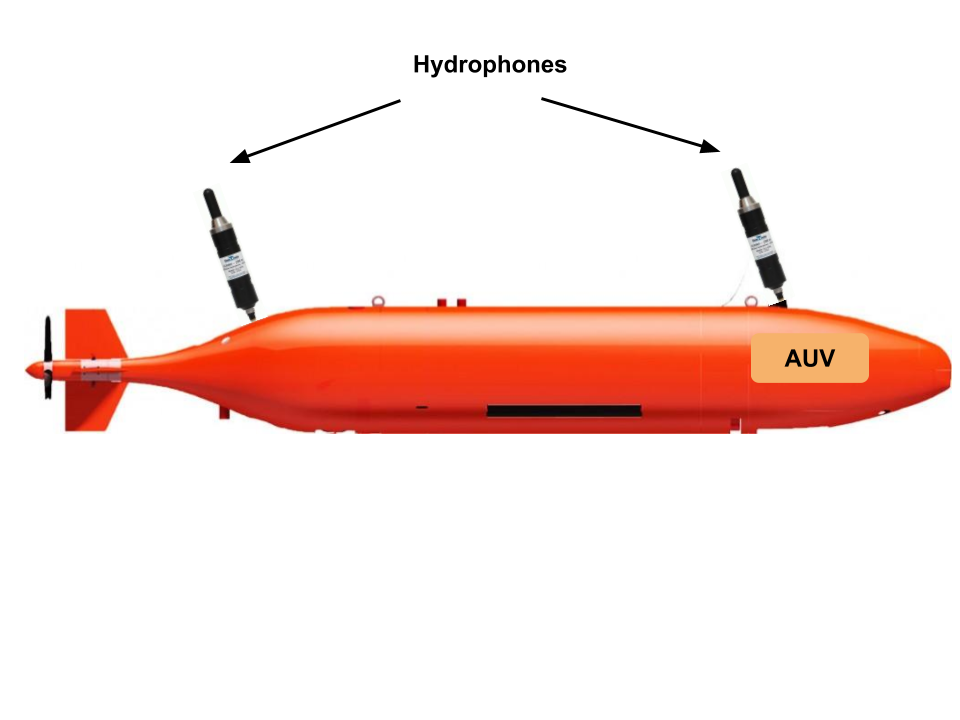
</center>
    

<center>
    <h1>Below is a simple illustration of the proposed method.</h1>
</center>

In [76]:
from math import sqrt

del x 
del y

plt.style.use('dark_background')

numrows = 2
horpts = 30
circpts = 15
rad = 2;
leng = 160;

cLx = rad*np.cos(np.linspace(3/2*np.pi,np.pi/2,circpts))
cLy = rad*np.sin(np.linspace(3/2*np.pi,np.pi/2,circpts))
cRx = rad*np.cos(np.linspace(-np.pi/2,np.pi/2,circpts))
cRy = rad*np.sin(np.linspace(-np.pi/2,np.pi/2,circpts))

x = 0
y = 0

for i in range(numrows):
    
    x = np.append(x,np.linspace(0,leng,horpts))
    x = np.append(x,cRx+leng)
    x = np.append(x,np.linspace(leng,0,horpts))
    x = np.append(x,cLx)
    
    y = np.append(y,np.linspace(i*4*rad,i*4*rad,horpts))
    y = np.append(y,cRy+(i*4+1)*rad)
    y = np.append(y,np.linspace((i*4+2)*rad,(i*4+2)*rad,horpts))
    y = np.append(y,cLy + (i*4+3)*rad)


x = np.append(x,np.linspace(0,80,15)) 
y = np.append(y,y[-1]*np.ones((15,1)))

n = len(x)
    
theta = np.linspace(0,6*np.pi,160)+np.pi/2
theta = np.flip(theta,axis=0)
r = 0.1*((1+sqrt(5))/2)**(2*theta/np.pi)
x1 = -r*np.cos(theta)
x1 = x1 + x[-1]
y1 = -r*np.sin(theta)
y1 = y1+y[-1]-y1[0]

x = np.append(x,x1)
y = np.append(y,y1)

pingx = x[-1]
pingy = y[-1]

scatx = []
scaty = []

    
def animate(i):
    if i < len(x):
        line.set_data(x[:i],y[:i])
    if i < len(x):
        auv.set_data(x[i],y[i])
    if i>=len(x):
        auv.set_data(125,80)
        line.set_data(125,80)
    if (i >= n) and (i<len(x)):
        scatx.append(x[i])
        scaty.append(y[i])
        scat.set_data(scatx,scaty)
    if i >= len(x)-158:
        pingerpos.set_data(pingx,pingy)
        plt.text(pingx+10,pingy-20,"Pinger position estimate",fontsize=18)

    
fig = plt.figure(figsize=(12,8))
ax = plt.gca()

line,= ax.plot([],[],linewidth=3)

scat, = ax.plot([],[],color='k')
scat.set_marker("o")
scat.set_markerfacecolor("r")
scat.set_markeredgecolor('r')
scat.set_markersize(10)

pingerpos, = ax.plot([],[])
pingerpos.set_marker("o")
pingerpos.set_markerfacecolor("b")
pingerpos.set_markeredgecolor("k")
pingerpos.set_markersize(14)

def get_hurricane():
    u = np.array([  [-5,0],
                    [-4,-1],
                    [1,-1],
                    [1,-1.5],
                    [2,-1.5],
                    [2,-1],
                    [4,0],
                    [3,0.5],
                    [3,1.75],
                    [3.5,2],
                    [3.5,2],
                    [2,2],
                    [2,1],
                    [-4,1],
                    [-5,0]])

    codes = [1] + [2]*(len(u)-2) + [2] 
    # u = np.append(u, -u[::-1], axis=0)
    # codes += codes
    return mpath.Path(3*u, codes, closed=False)

hurr = get_hurricane()

auv, = ax.plot([],[])
auv.set_marker(hurr)
auv.set_markersize(50)
auv.set_markerfacecolor([0.9, 0.8, 0])
auv.set_markeredgecolor('k')
        
plt.axis('equal')
ax.set_xlim(np.min(x)-20,np.max(x)+20)
ax.set_ylim(np.min(y)-20,np.max(y)+20)
plt.axis("off")
plt.title("Proposed method",fontsize=24)


ani = animation.FuncAnimation(fig,animate,frames=len(x)+3,interval=40,repeat=False)

plt.close("all")

HTML(ani.to_html5_video())



<font size="4">
    <center>
    <p1> When a ping is detected by the hydrophones, the AUV enters a localization mode.</p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
    <p1> The time difference of arrival of pings between the hydrophones is used to estimate a relative bearing to the pinger. </p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
    <p1> The AUV travels at an angle to this bearing estimate, meanwhile calculating a new estimate.</p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
    <p1> This causes the AUV to spiral in on the sound source.</p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
    <p1> ...but by intersecting the bearing estimates, the pinger position is known long before the AUV gets there.</p1>
    </center>
</font>
<br></br>


<font size="4">
    <center>
    <p1> To obtain the bearing estimate, the AUV must create a synthetic array.</p1>
    </center>
</font>
<br></br>
<font size="4">
    <center>
    <p1>Below is one AUV path geometry that does this effectively.</p1>
    </center>
</font>
<br></br>

In [78]:

fig = plt.figure(figsize=(11,8))
ax = p3.Axes3D(fig)
title = ax.set_title('AUV generating a synthetic array with maximum pitch = 25 degrees',fontsize=22)
ax.set_axis_on()
ax.view_init(elev=40, azim=20)
rcParams['axes.titlepad'] = 0

DATA_temp = np.loadtxt("C:/Users/emushka/Desktop/slantcircdemo.txt")
DATA_temp = np.flip(DATA_temp,axis=0)
zmax = np.max(DATA_temp[:,2])
DATA = np.zeros((1, DATA_temp.shape[1],DATA_temp.shape[0]))
DATA[0,:,:] = DATA_temp.transpose()


Lm = 40
ax.set_xlim(-Lm,Lm)
ax.set_ylim(-Lm,Lm)
ax.set_zlim(-Lm,Lm/2)

def init(): 
    # creating an empty plot/frame  
    for line in lines:
        line.set_data([],[])
        line.set_3d_properties([])
    return lines


x,y,z = [],[],[]

def animate(num,dataLines,lines):
    for line,data in zip(lines,dataLines):
        line.set_data(data[0:2,:num])
        line.set_3d_properties(data[2,:num])
        line.set_marker(hurr)
        line.set_markerfacecolor("y")
        line.set_markeredgecolor('k')
        line.set_markersize(32)
    return lines

for ind in range(200):
    
    current = 0.2*ind
    x0 = Lm*np.cos(current)
    y0 = Lm*np.sin(current)
    z0 = current/2
    
    x.append(x0)
    y.append(y0)
    z.append(z0)
    
# data = np.array([[x,y,z]])
lines = [ax.plot(dat[0,0:1],dat[1,0:1],dat[2,0:1])[0] for dat in DATA]
# lines = [ax.plot(DATA[0,0:1],dat[1,0:1],dat[2,0:1])[0] for dat in DATA]

plt.axis("off")
anim = animation.FuncAnimation(fig, animate,fargs=(DATA,lines),
                               init_func=init,interval=500, blit=True,
                               repeat = True) 
# plt.show()
plt.close("all")

# anim.save('randrot1.gif', dpi=100, fps=1, writer='html')
HTML(anim.to_html5_video())
#rc('animation', html='html5')